# Lab 10 - Deep Learning
- **Author:** Suraj R. Nair, based on previous material by Emily Aiken.
- **Date:** April 3, 2024
- **Course:** INFO 251: Applied machine learning

## Topics:
1. Convolutional neural networks

## Learning Goals:
At the end of this lab, you will...
- Understand the structure of convolutional neural networks
- Know the key hyperparameters of convolutional neural networks

## Resources:
- [Keras dropout layer](https://keras.io/api/layers/regularization_layers/dropout/)
- [Keras convolutional layers](https://keras.io/api/layers/convolution_layers/)
- [Keras pooling layers](https://keras.io/api/layers/pooling_layers/)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import random

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l1, l2
import tensorflow as tf

## Convolutional Neural Networks
#### Load MNIST data
- Notice: All images are the same size
- Notice: Images are in greyscale --> only one channel for CNN

In [2]:
# Load data
digits = datasets.load_digits()

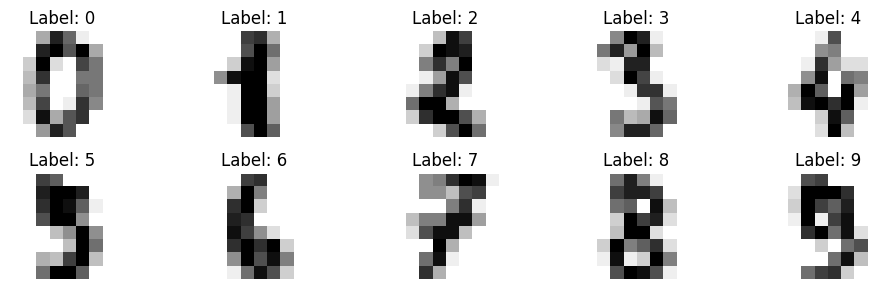

In [3]:
# Show some of the images
fig, ax = plt.subplots(2, 5, figsize=(10, 3))
ax = ax.flatten()
for a, image, label in zip(ax, digits.images, digits.target):
    a.set_axis_off()
    a.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    a.set_title("Label: %i" % label)
plt.tight_layout()
plt.show()

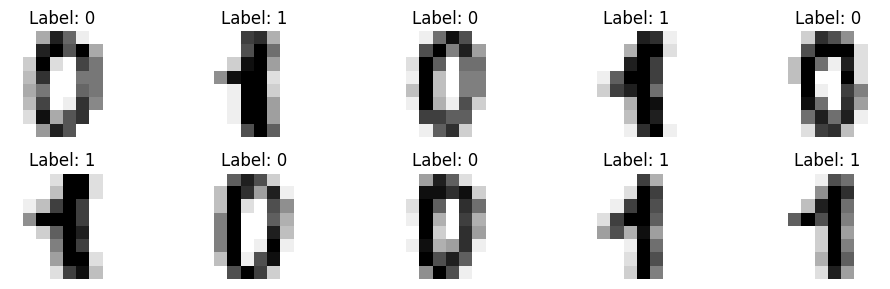

In [4]:
# Restrict to two classes -- we'll just look for the difference between 2 and 3
twos_threes = np.where((digits.target == 0) | (digits.target == 1))
x = digits.images[twos_threes]
y = digits.target[twos_threes]

fig, ax = plt.subplots(2, 5, figsize=(10, 3))
ax = ax.flatten()
for a, image, label in zip(ax, x, y):
    a.set_axis_off()
    a.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    a.set_title("Label: %i" % label)
plt.tight_layout()
plt.show()

In [5]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.25, random_state=0)

#### Preprocessing

In [6]:
# Standardization
mean_pixel = np.mean(x_train, axis=0)
std_pixel = np.std(x_train, axis=0) + 0.000000001
x_train = (x_train - mean_pixel)/std_pixel
x_test = (x_test - mean_pixel)/std_pixel

In [7]:
# Reshape train data
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

#### CNN: Single Conv Layer

In [16]:

model_base = Sequential()
model_base.add(Conv2D(3, kernel_size=(3, 3), strides=1, activation='relu', input_shape=x_train.shape[1:]))
model_base.add(Flatten())
model_base.add(Dense(1, activation='sigmoid')) 
model_base.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [17]:
history = model_base.fit(x_train, y_train, epochs=10, batch_size=16, verbose=0)
yhat_train = model_base.predict(x_train)
yhat_test = model_base.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [18]:
yhat_train_binary = yhat_train > 0.5
yhat_test_binary = yhat_test > 0.5

print('Accuracy score on training set: %.4f' % accuracy_score(y_train, yhat_train_binary))
print('Accuracy score on test set: %.4f' % accuracy_score(y_test, yhat_test_binary))
print('AUC score on training set: %.4f' % roc_auc_score(y_train, yhat_train))
print('AUC score on test set: %.4f' % roc_auc_score(y_test, yhat_test))

Accuracy score on training set: 1.0000
Accuracy score on test set: 0.9778
AUC score on training set: 1.0000
AUC score on test set: 0.9744


In [11]:
model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 6, 6, 3)             │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 108)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             109 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 419 (1.64 KB)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 280 (1.10 KB)

<Axes: >

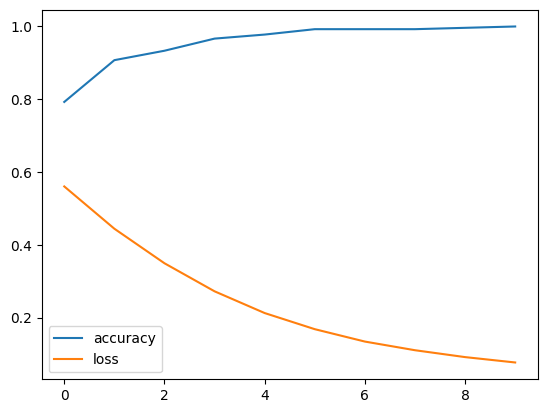

In [23]:
### Plotting epoch-wise summary

pd.DataFrame(history.history).plot()

#### CNN: More Layers + Pooling

In [134]:
# TODO: Tune the above CNN. Consider changing the convolutional filters, adding dropout layers, changing the 
# activation functions, or changing the optimization strategy. Try to exceed 0.98 AUC on the test set. 

In [19]:
model = Sequential()
model.add(Conv2D(filters=24, kernel_size=(3, 3), strides=1, activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=1, activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(12, activation='relu')) 
model.add(Dense(5, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 24)            │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 12)            │           2,604 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 2, 2, 12)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 12)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,503 (13.68 KB)

 Trainable params: 3,503 (13.68 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history1 = model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=0)
yhat_train1 = model.predict(x_train)
yhat_test1 = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [22]:
yhat_train_binary1 = yhat_train1 > 0.5
yhat_test_binary1 = yhat_test1 > 0.5

print('Accuracy score on training set: %.4f' % accuracy_score(y_train, yhat_train_binary1))
print('Accuracy score on test set: %.4f' % accuracy_score(y_test, yhat_test_binary1))
print('AUC score on training set: %.4f' % roc_auc_score(y_train, yhat_train1))
print('AUC score on test set: %.4f' % roc_auc_score(y_test, yhat_test1))

Accuracy score on training set: 1.0000
Accuracy score on test set: 1.0000
AUC score on training set: 1.0000
AUC score on test set: 1.0000


In [ ]:
### Under the hood

In [29]:
weights, biases = model.layers[0].get_weights()